In [3]:
"""=============================================================================
    File [people.txt] chứa nhiệt độ, giới tính, nhịp tim 130 người từ Journal of
    Statistics Education (Shoemaker 1996).
        1. Đọc dữ liệu từ tập tin nói trên.
        2. Vẽ histogram cho cột Tempt.
        3. Tìm thống kê chung của Tempt.
        4. Tìm mean, median, mode => cho nhận xét
        5. Cho biết giá trị Tempt ở phân vị thứ [0, 1, 2, 2.5, 97.5, 98, 99, 100]
        6. Tạo bộ mẫu có 10.000 'temperatures' theo normal distribution 
           với mean, std của bộ dữ liệu trên. Vẽ histogram để quan sát.
        7. Cho biết Three-Sigma-Rules ở các khoảng thứ 1, 2, 3.
        8. Tìm z-score cho thân nhiệt 99.5. Xác định phân vị tương ứng.
============================================================================="""
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import re
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [4]:
print('======================================================')
print('*** 1. Đọc dữ liệu từ tập tin people.txt nói trên. ***')
print('======================================================')

f = open('data_buoi9&10&11/people.txt')
data_raw = f.read().split('\n')

#print('Raw data:\n') #display raw data
#data_raw

data_processed = []
for row in data_raw:
    row = row.replace('\t',' ') #Convert all tab character ('\t') into ' ' space character
    new_row = []
    for element in row.split(' '): #split the row into a list of strings by separator = ' '
        if element != '': new_row.append(element) #find the elements that are not '' and put them in the new_row list
    data_processed.append(new_row) #add new_row as an element into data_processed list

#print('Processed data list:') #display processed data
#data_processed

#Create data frame from processed data:
df_people = pd.DataFrame(data_processed[1:],columns=data_processed[0])

df_people

*** 1. Đọc dữ liệu từ tập tin people.txt nói trên. ***


,Temp,Gender,Heat
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73
...,...,...,...
125,99.3,2,68
126,99.4,2,77
127,99.9,2,79
128,100.0,2,78


*** 2. Vẽ histogram cho cột Temp. ***


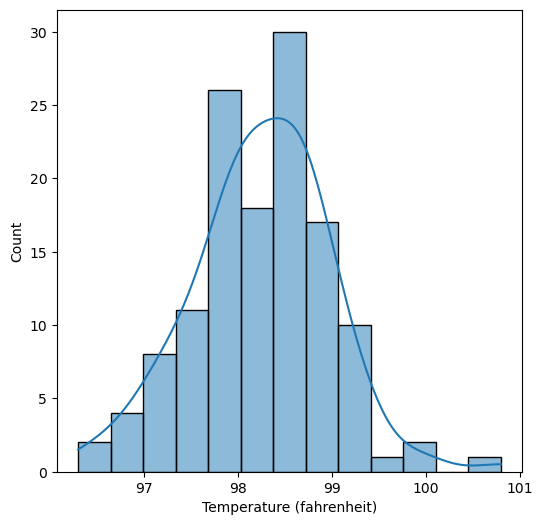

In [9]:
print('======================================')
print('*** 2. Vẽ histogram cho cột Temp. ***')
print('======================================')

df_people.Temp = pd.to_numeric(df_people.Temp, errors='coerce') #pd.to_numeric(x, errors='coerce') to convert the numeric string into numeric data
                                                                #the errors='coerce' to convert all non-numeric into NaN values
fig = plt.figure(figsize=(6,6))
sbn.histplot(data=df_people, x='Temp',kde=True) 
                                                         
plt.xlabel('Temperature (fahrenheit)')
plt.show()

In [11]:
print('========================================')
print('*** 3. Tìm thống kê chung của Tempt. ***')
print('========================================')

df_people.Temp.describe()

*** 3. Tìm thống kê chung của Tempt. ***


count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: Temp, dtype: float64

In [13]:
print('=================================================')
print('*** 4. Tìm mean, median, mode => cho nhận xét ***')
print('=================================================')

print(f'\nMean of df_people.Temp = {np.mean(df_people.Temp)}')
print(f'\nMedian of df_people.Temp = {np.median(df_people.Temp)}')
print(f'\nMode of df_people.Temp = {stats.mode(df_people.Temp)[0]}')

print('\nComment: the mean, median and mode of df_people.Temp are nearly the same.')

*** 4. Tìm mean, median, mode => cho nhận xét ***

Mean of df_people.Temp = 98.24923076923078

Median of df_people.Temp = 98.3

Mode of df_people.Temp = 98.0

Comment: the mean, median and mode of df_people.Temp are nearly the same.


In [15]:
print('=================================================================================')
print('*** 5. Cho biết giá trị Tempt ở phân vị thứ [0, 1, 2, 2.5, 97.5, 98, 99, 100] ***')
print('=================================================================================')

qth_list = [0, 1, 2, 2.5, 97.5, 98, 99, 100]

temp_perc_value = np.percentile(df_people.Temp, qth_list)

print()
for i in range(len(qth_list)):
    print(f'{qth_list[i]}-th percentile of df_people.Temp = {temp_perc_value[i]}')

*** 5. Cho biết giá trị Tempt ở phân vị thứ [0, 1, 2, 2.5, 97.5, 98, 99, 100] ***

0-th percentile of df_people.Temp = 96.3
1-th percentile of df_people.Temp = 96.48700000000001
2-th percentile of df_people.Temp = 96.7
2.5-th percentile of df_people.Temp = 96.7225
97.5-th percentile of df_people.Temp = 99.4775
98-th percentile of df_people.Temp = 99.668
99-th percentile of df_people.Temp = 99.971
100-th percentile of df_people.Temp = 100.8


***  6. Tạo bộ mẫu có 10.000 "temperatures" theo normal distribution với mean, std của bộ dữ liệu trên. Vẽ histogram để quan sát. ***


Text(0.5, 0, 'Temperature (fahrenheit)')

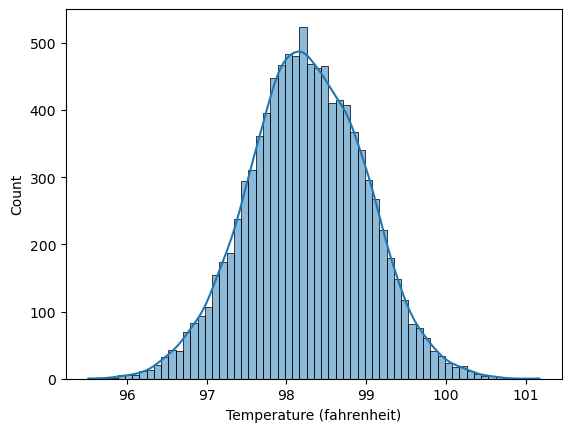

In [17]:
print('=====================================================================================================================================')
print('***  6. Tạo bộ mẫu có 10.000 "temperatures" theo normal distribution với mean, std của bộ dữ liệu trên. Vẽ histogram để quan sát. ***')
print('=====================================================================================================================================')

mean_temp = np.mean(df_people.Temp)
std_temp = np.std(df_people.Temp)

temp_norm = stats.norm.rvs(loc = mean_temp, scale = std_temp, size = 10000)

sbn.histplot(temp_norm, kde=True)
plt.xlabel('Temperature (fahrenheit)')

In [19]:
print('================================================================')
print('***  7. Cho biết Three-Sigma-Rules ở các khoảng thứ 1, 2, 3. ***')
print('================================================================')

#sigma here is the standard deviation

three_sigma = [std_temp, std_temp*2, std_temp*3]

print('\nThree sigmas of df_people.Temp at 1, 2 and 3:',three_sigma)

***  7. Cho biết Three-Sigma-Rules ở các khoảng thứ 1, 2, 3. ***

Three sigmas of df_people.Temp at 1, 2 and 3: [0.730357778905038, 1.460715557810076, 2.191073336715114]


In [29]:
print('========================================================================')
print('***  8. Tìm z-score cho thân nhiệt 99.5. Xác định phân vị tương ứng. ***')
print('========================================================================')

z_99_point_5 = (99.5 - mean_temp)/std_temp
print(f'\nZ-score of 99.5 fahrenheit = {z_99_point_5}')

P_99_point_5 = np.extract(df_people.Temp <= 99.5, df_people.Temp).size/df_people.Temp.size
print(f'\nQ-th percentile of 99.5 fahrenheit = {round(P_99_point_5*100)}-th')

***  8. Tìm z-score cho thân nhiệt 99.5. Xác định phân vị tương ứng. ***

Z-score of 99.5 fahrenheit = 1.7125431766392523

Q-th percentile of 99.5 fahrenheit = 98-th
